In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load COCO class names
with open("coco.names", "r") as f:
    classes = f.read().strip().split('\n')


In [ ]:
# Load an image
image = cv2.imread("/content/dog_bike_car.jpg")

# Get image dimensions
height, width, _ = image.shape

# Preprocess image for YOLO
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)

In [ ]:
print(detections)
print(detections.shape)


[[0.00961538 0.00961538 0.02403846 ... 0.25       0.25       0.25      ]
 [0.00961538 0.00961538 0.03846154 ... 0.25       0.25       0.25      ]
 [0.00961538 0.00961538 0.07932692 ... 0.25       0.25       0.25      ]
 ...
 [0.99038464 0.99038464 0.02403846 ... 0.25       0.25       0.25      ]
 [0.99038464 0.99038464 0.03846154 ... 0.25       0.25       0.25      ]
 [0.99038464 0.99038464 0.07932692 ... 0.25       0.25       0.25      ]]
(8112, 85)


In [ ]:
from google.colab.patches import cv2_imshow


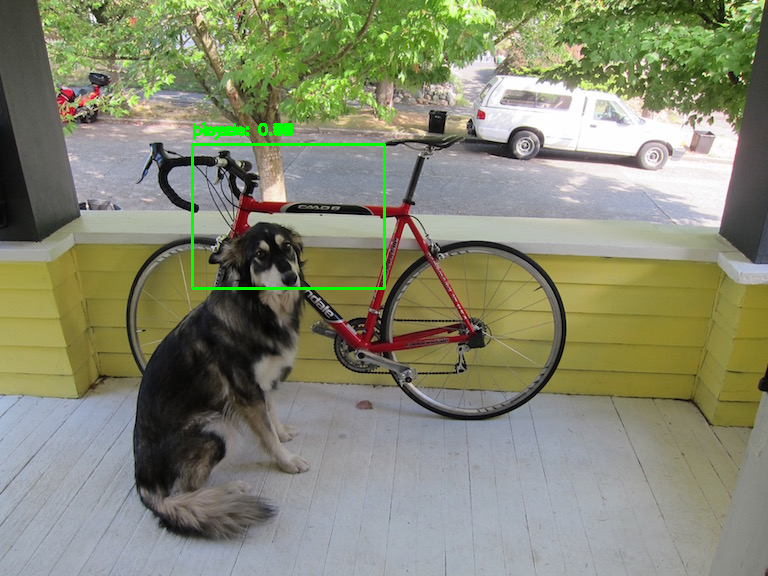

In [ ]:
for detection in detections:
    # Get class probabilities (the first 80 elements) and the box coordinates (the remaining elements)
    class_probs = detection[:80]
    box_coords = detection[80:]

    # Find the class with the highest probability
    class_id = np.argmax(class_probs)
    confidence = class_probs[class_id]

    if confidence > 0.5:  # Adjust the confidence threshold as needed
        # Get the coordinates of the bounding box (4 values)
        x, y, w, h = box_coords[:4]

        # Scale the coordinates to the image dimensions
        x = int(x * width)
        y = int(y * height)
        w = int(w * width)
        h = int(h * height)

        # Draw bounding box and label
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = f"{classes[class_id]}: {confidence:.2f}"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
